# Heart Failure Prediction

### ardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
### أمراض الأوعية الدموية هي السبب الأول للوفاة على مستوى العالم ، حيث تودي بحياة ما يقدر بنحو 17.9 مليون شخص كل عام ، وهو ما يمثل 31 ٪ من جميع الوفيات في جميع أنحاء العالم.فشل القلب هو حدث شائع تسببه الأمراض القلبية الوعائية وتحتوي مجموعة البيانات هذه على 12 ميزة يمكن استخدامها للتنبؤ بالوفيات بسبب قصور القلب

## Import Libraries .. تحميل المكتبات

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## Algorithm make model better / لتحسين عمل المديول

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.metrics import classification_report ## لقياس كفائة المديول
from sklearn.metrics import confusion_matrix ## لقياس كفائة المديول


## Import Data .. تحميل البيانات

In [2]:
data=pd.read_csv(r'C:\Users\INFEG\Downloads\Heart Failure Prediction\heart_failure_clinical_records_dataset.csv')

## explore Data .. استكشاف البيانات

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
data.info() ##colums data-types  and data size / نوع البيانات فى الأعمدة وحجم البيانات

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
data.shape

(299, 13)

In [8]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:>

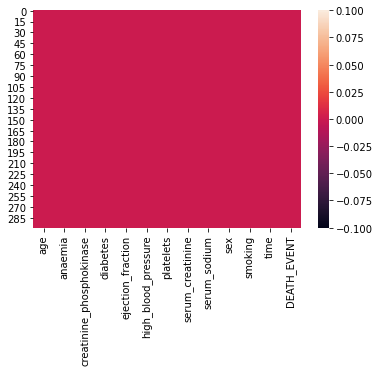

In [9]:
sns.heatmap(data.isnull())

In [10]:
data.duplicated().sum()

0

In [11]:
## data is to small but clean and fit type for modeling ..
##البيانات قليلة ولكن نظيفة لاتحتاج للمعالجة حيث أنها مكتملة ونوع البيانات كأرقام مناسب لعمل الموديول

## Data Analysis

In [12]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

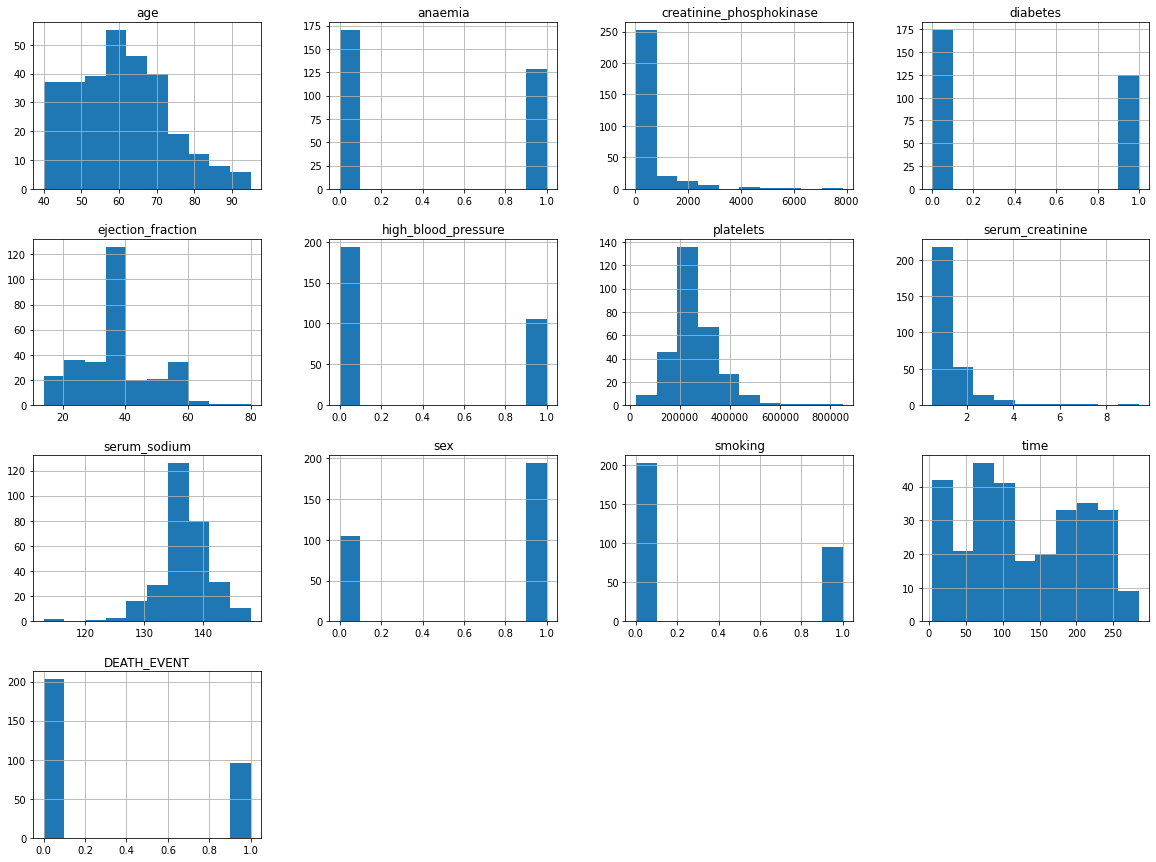

In [13]:
data.hist(figsize=(20,15))
plt.show()

In [14]:
countinues_data=data[['age','creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine', 'serum_sodium','time']]

Text(0.5, 1.0, 'Relation between all features and death')

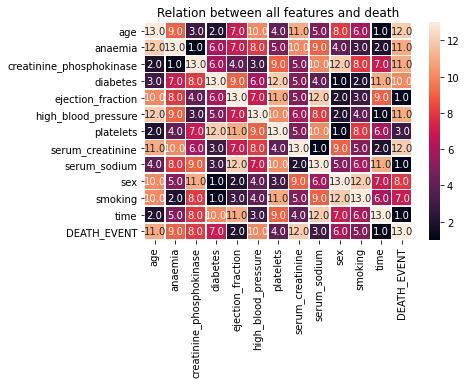

In [16]:
cor=data.corr()
sns.heatmap(cor.rank(axis='columns'),annot=True,fmt=".1f",linewidth=.5)
plt.title('Relation between all features and death')

## Creat Model .. بدأ عمل المديول 

In [17]:
x=data.drop('DEATH_EVENT',axis=1)
y=data['DEATH_EVENT']

In [18]:
accuracy_list=[]

In [19]:
x_train , x_test , y_train  ,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [47]:
scalar=StandardScaler()
x_tr_scal=scalar.fit_transform(x_train)
x_ts_scal=scalar.fit_transform(x_test)

In [65]:
def learn_model(model):
    model.fit(x_tr_scal,y_train)
    pre=model.predict(x_ts_scal)
    accuracy=classification_report(pre,y_test)
    print('accuracy = ',classification_report(pre,y_test),4)
    print('accuracy-confution-matrix = ',confusion_matrix(pre,y_test))
    accuracy_list.append(accuracy)

In [66]:
model1=LogisticRegression()
learn_model(model1)

accuracy =                precision    recall  f1-score   support

           0       0.93      0.89      0.91        45
           1       0.71      0.80      0.75        15

    accuracy                           0.87        60
   macro avg       0.82      0.84      0.83        60
weighted avg       0.87      0.87      0.87        60
 4
accuracy-confution-matrix =  [[40  5]
 [ 3 12]]


In [67]:
model2=RandomForestClassifier()
learn_model(model2)

accuracy =                precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.82      0.82      0.82        17

    accuracy                           0.90        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.90      0.90      0.90        60
 4
accuracy-confution-matrix =  [[40  3]
 [ 3 14]]


In [68]:
model3=DecisionTreeClassifier()
learn_model(model3)

accuracy =                precision    recall  f1-score   support

           0       0.86      0.93      0.89        40
           1       0.82      0.70      0.76        20

    accuracy                           0.85        60
   macro avg       0.84      0.81      0.82        60
weighted avg       0.85      0.85      0.85        60
 4
accuracy-confution-matrix =  [[37  3]
 [ 6 14]]


In [69]:
model4=KNeighborsClassifier()
learn_model(model4)

accuracy =                precision    recall  f1-score   support

           0       0.93      0.82      0.87        49
           1       0.47      0.73      0.57        11

    accuracy                           0.80        60
   macro avg       0.70      0.77      0.72        60
weighted avg       0.85      0.80      0.81        60
 4
accuracy-confution-matrix =  [[40  9]
 [ 3  8]]


In [70]:
model5=GaussianNB()
learn_model(model5)


accuracy =                precision    recall  f1-score   support

           0       0.91      0.83      0.87        47
           1       0.53      0.69      0.60        13

    accuracy                           0.80        60
   macro avg       0.72      0.76      0.73        60
weighted avg       0.83      0.80      0.81        60
 4
accuracy-confution-matrix =  [[39  8]
 [ 4  9]]


In [71]:
model6=SVC()
learn_model(model6)

accuracy =                precision    recall  f1-score   support

           0       0.88      0.86      0.87        44
           1       0.65      0.69      0.67        16

    accuracy                           0.82        60
   macro avg       0.77      0.78      0.77        60
weighted avg       0.82      0.82      0.82        60
 4
accuracy-confution-matrix =  [[38  6]
 [ 5 11]]


In [72]:
model7=GradientBoostingClassifier()
learn_model(model7)

accuracy =                precision    recall  f1-score   support

           0       0.98      0.93      0.95        45
           1       0.82      0.93      0.87        15

    accuracy                           0.93        60
   macro avg       0.90      0.93      0.91        60
weighted avg       0.94      0.93      0.93        60
 4
accuracy-confution-matrix =  [[42  3]
 [ 1 14]]
